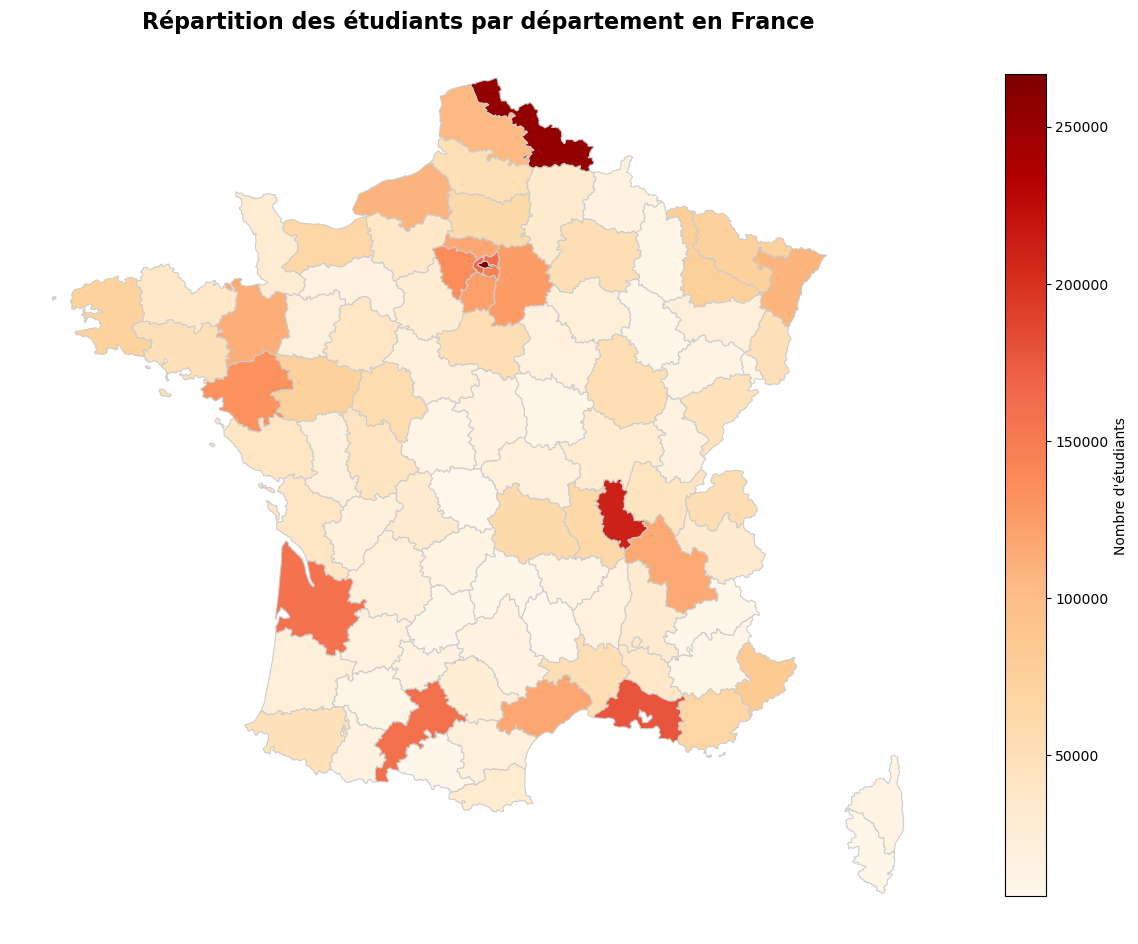

In [3]:
import pandas as pd 
import geopandas as gpd 
import matplotlib.pyplot as plt 
#Charger les données Excel
df = pd.read_excel("Classeur1.xlsx", sheet_name="population age sexe") 
#Renommer les colonnes pour faciliter la manipulation
df = df.rename(columns={ 'Département de résidence': 'dep', 'Ensemble des personnes scolarisées': 'etudiants' }) 
#Convertir le code département en chaîne de caractères avec deux chiffres
df['dep'] = df['dep'].astype(str).str.zfill(2) 
#Charger le fichier GeoJSON des départements (internet requis)
geojson_url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson" 
departements_geo = gpd.read_file(geojson_url) 
#Fusionner les données Excel avec la carte
merged = departements_geo.merge(df, left_on='code', right_on='dep') 
#Création de la carte choroplèthe
fig, ax = plt.subplots(figsize=(12, 14)) 
merged.plot( column='etudiants', 
            cmap='OrRd', # Dégradé de rouge 
            linewidth=0.8, 
            ax=ax, 
            edgecolor='0.8', 
            legend=True, 
            legend_kwds={'label': "Nombre d'étudiants", 'shrink': 0.6} ) 
#Mise en forme
ax.set_title("Répartition des étudiants par département en France", 
             fontsize=16, 
             fontweight='bold') 
ax.axis('off') 
fig.patch.set_facecolor('#ffffff') 
plt.tight_layout() 
plt.show()

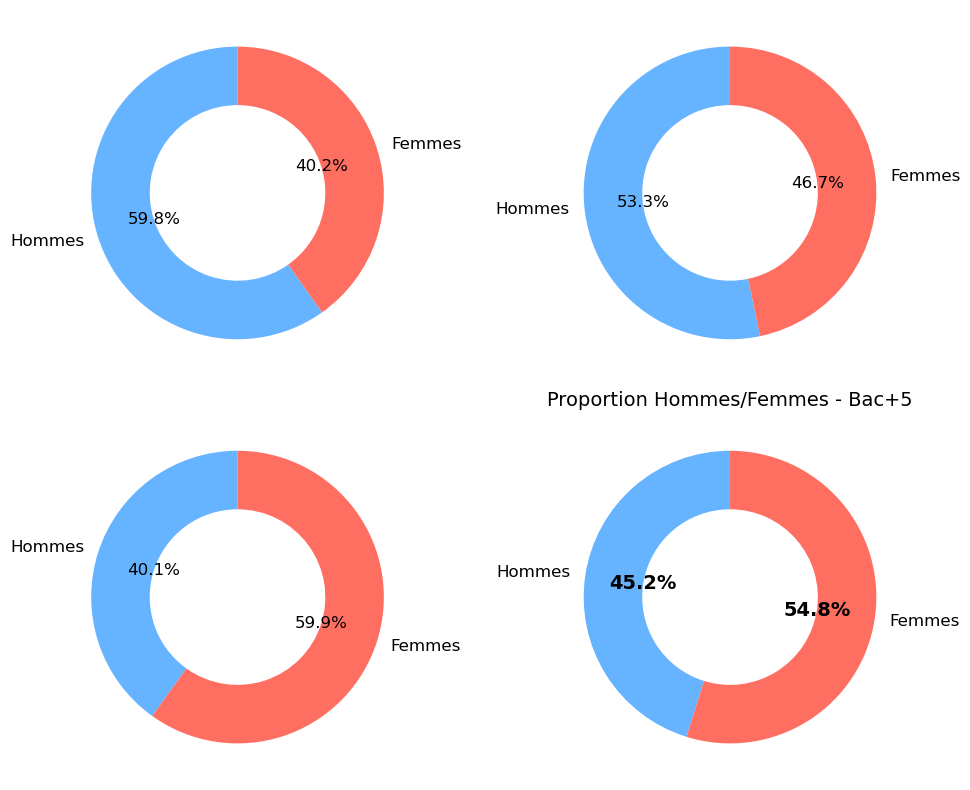

In [15]:
import matplotlib.pyplot as plt
##Données en pourcentage pour chaque diplôme
data = { 'CAP, BEP': [59.8, 40.2], 'Bac': [53.3, 46.7], 'Bac+3': [40.1, 59.9], 'Bac+5': [45.2, 54.8] } 
labels = ['Hommes', 'Femmes'] 
colors = ['#66b3ff', '#ff6f61'] # bleu / rouge clair 
#Création des 4 sous-graphiques
fig, axs = plt.subplots(2, 2, figsize=(10, 8)) 
axs = axs.flatten() 
for i, (titre, valeurs) in enumerate(data.items()): 
    wedges, texts, autotexts = axs[i].pie( valeurs, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.4), # donut style 
    textprops={'fontsize': 12} ) 
for autotext in autotexts: 
    autotext.set_fontsize(14) 
    autotext.set_weight('bold') 
    axs[i].set_title(f"Proportion Hommes/Femmes - {titre}", fontsize=14) 
#Mise en page
plt.tight_layout() 
plt.savefig("donuts_hommes_femmes.png", dpi=300) 
plt.show()
